# CUSTOMER CHURN RATE ANALYSIS

Customer Churn rate is defined as the measure of rate of customer leaving a group or a company directly or indirectly over a given period of time. 
Here, we have used <b>Telco Customer Churn Rate</b> dataset from kaggle.com to perform the analysis.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
base_data.shape

(7043, 21)

In [5]:
base_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior citizen's column is not proper because it is a categorical data where 0 would mean not a senior citizen and 1 mean senior citizen

25% people have tenure less than or equal to 59 yrs
50% people have tenure less than or equal to 29 yrs
75% people have tenure less than or equal to 55 yrs

Mean valur of monthly charges is 64.76 & Max value is 118.75

In [7]:
base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

'TotalCharges' has object datatype which need to be converted into float64 

In [8]:
#copying the dataset into another variable to manipulate and analyse
df = base_data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<b>Note</b>: Since data doesn't have equal number of input, we would require to perform <b>upsampling</b> for model building

In [10]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<b>Note: </b>Clearly, we have 11 NaN in 'TotalCharges'

In [12]:
df.loc[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
df.dropna(axis=0,how='any',inplace=True)

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#We'll drop the column which we do not require in our model 
df.drop(columns=['customerID'], inplace=True, axis=1)

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EXPLORATORY DATA ANALYSIS (EDA)

In [17]:
sns.set_theme(style='whitegrid')

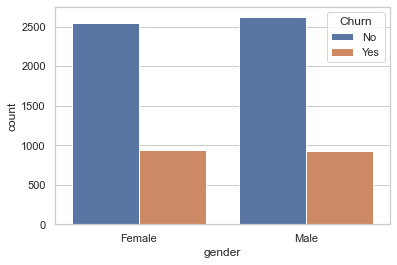

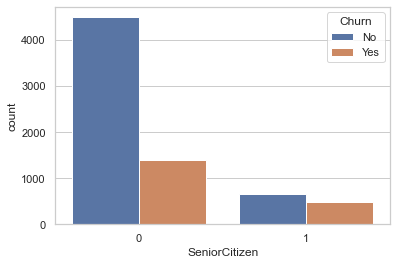

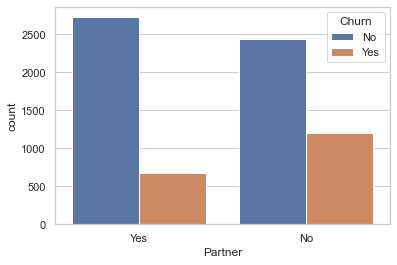

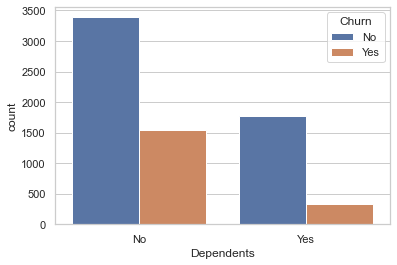

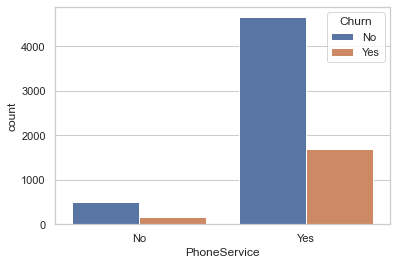

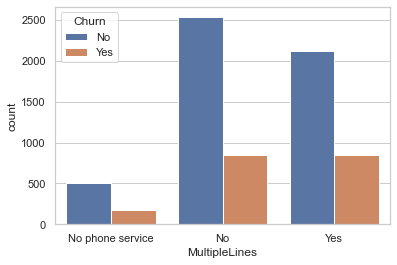

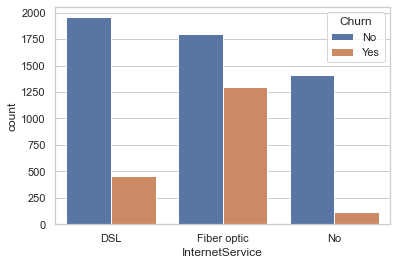

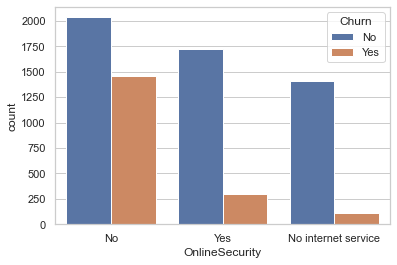

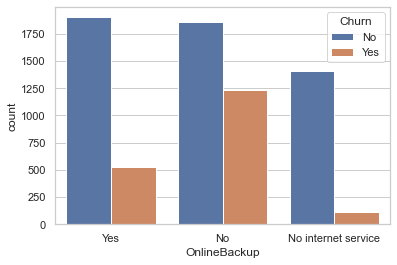

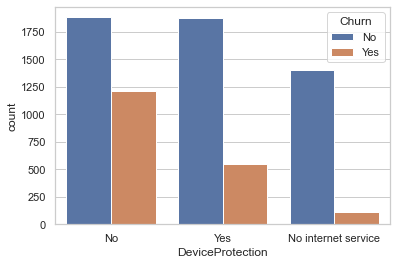

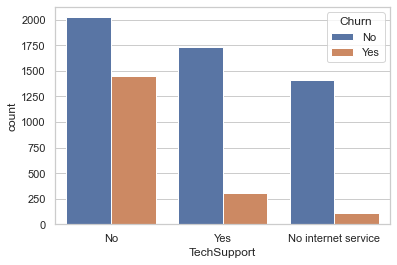

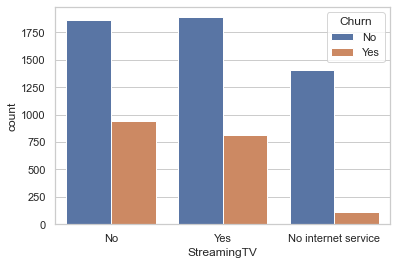

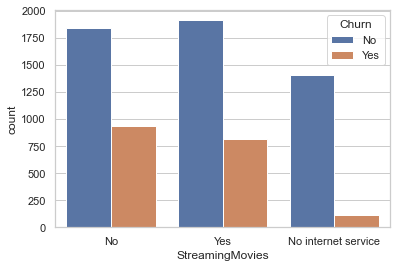

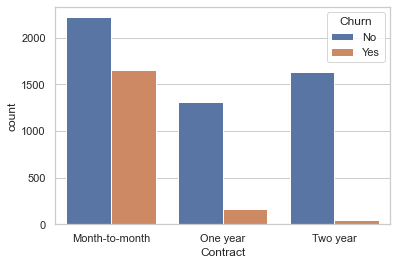

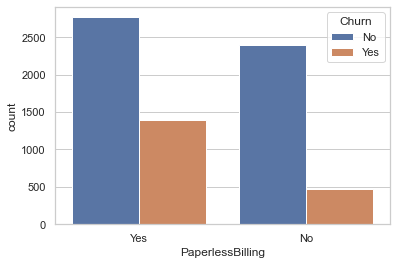

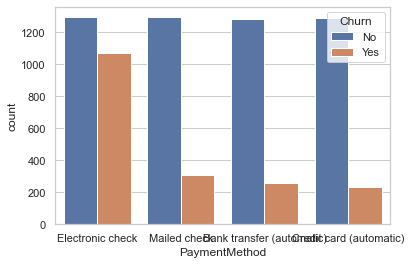

In [18]:
for i, x in enumerate(df.drop(columns=['Churn','MonthlyCharges','TotalCharges','tenure'], axis=1)):
    plt.figure(i)
    sns.countplot(data=df,hue='Churn',x=x)

<b>Some inferences</b>:
1. Male Female both have almost 50-50% chance of getting churned

2. Not a senior citizen have less churn percentage

3. Having a partner has more churn percentage as compared to not having a partner

4. Dependents are inversely proportional to partner

5. Having Fiber optic has the highest churn percentage among all internet service

6. No online security, no OnlineBackup, no DeviceProtection, no TechSupport creates more churning

7. One year contract customers are less likely to churn as compared to Month-to-Month

8. Electronic check payment method customers are most likely to churn among all payment methods

In [19]:
print(df['tenure'].unique().max())
print(df['tenure'].unique().min())
print(df['tenure'].nunique())
print(df['tenure'].unique())

72
1
72
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]


<AxesSubplot:xlabel='tenure', ylabel='count'>

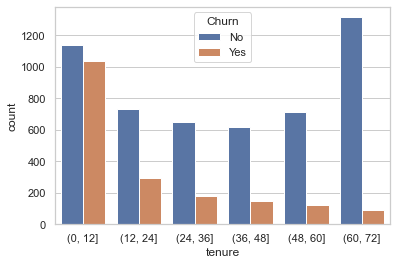

In [20]:
tenure_bins = pd.cut(df['tenure'], bins = range(0,73,12))
sns.countplot(data=df, x= tenure_bins, hue = 'Churn')

<b>Note: </b>Here, we can see that tenure above 60yrs are very less likely to churn whereas tenure below 12yrs has the highest churn rate which is close to 50%

In [21]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [22]:
#get_dummies() function converts all the categorical variables into dummy variables or performs one-hot encoding
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


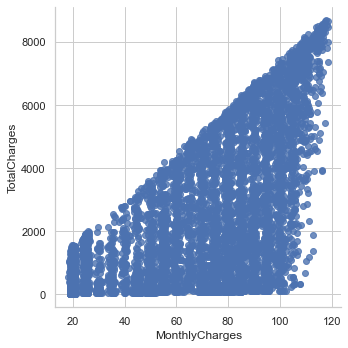

In [23]:
sns.lmplot(data=df_dummies, x = 'MonthlyCharges', y = 'TotalCharges', fit_reg=False)

<b>Note:</b> As Monthly Charges increases Total Charges also increased (as expected).

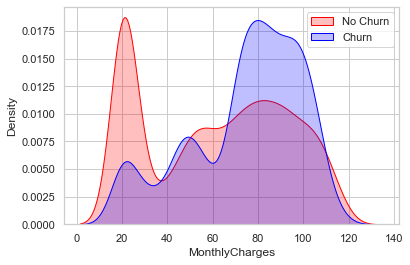

In [24]:
MonthlyCharge_churn = sns.kdeplot(data = df.MonthlyCharges[df['Churn']==0], color = "Red", shade = True)
MonthlyCharge_churn = sns.kdeplot(data = df.MonthlyCharges[df['Churn']==1], color = "Blue", shade = True)
MonthlyCharge_churn.legend(['No Churn', 'Churn'])

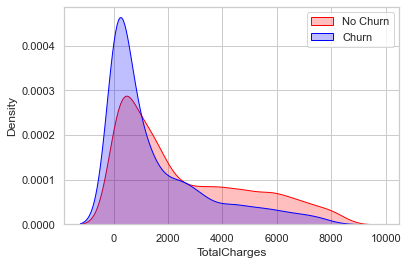

In [25]:
TotalCharge_churn = sns.kdeplot(data = df.TotalCharges[df['Churn']==0], color = "Red", shade = True)
TotalCharge_churn = sns.kdeplot(data = df.TotalCharges[df['Churn']==1], color = "Blue", shade = True)
TotalCharge_churn.legend(['No Churn','Churn'])

<b>Note</b>: Among the 3 variables which had large number of unique values resulted the following 

<b>Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.</b> 

<AxesSubplot:>

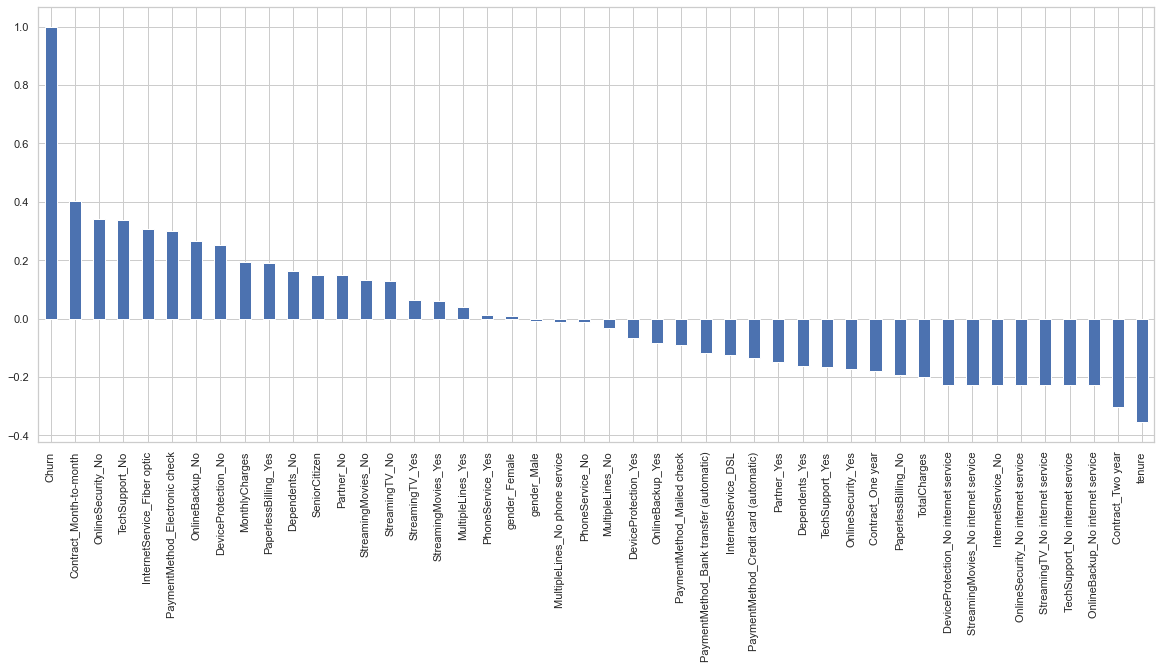

In [26]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Some Conclusions:

  
  <b>High Churn</b> is seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

   <b>Low Churn</b> is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for higher period of duration

   Factors like Gender, Availability of PhoneService and number of multiple lines have alomost <b>no impact on Churn</b>

# Model Building

In [27]:
#importing libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN

In [28]:
x=df_dummies.drop('Churn',axis=1)
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [29]:
y=df_dummies['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [30]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

## Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state = 100,max_depth=7, min_samples_leaf=10)

In [32]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=100)

In [33]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
clf.score(x_test,y_test)

0.767590618336887

In [35]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1026
           1       0.58      0.51      0.55       381

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



<b>Note: </b>Since we had more data for 0 than for 1, we see that more precision obtained for 0

To solve this, we will do upsampling, using <b>SMOTE(Synthetic Minority Oversampling Technique)</b>

In [36]:
smote = SMOTEENN()
x_resampled, y_resampled = smote.fit_resample(x,y)

In [37]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled, y_resampled,test_size=0.2)

In [38]:
clf_smote=DecisionTreeClassifier(random_state = 100,max_depth=7, min_samples_leaf=10)

In [39]:
clf_smote.fit(xr_train,yr_train)
yr_predict = clf_smote.predict(xr_test)
score_r = clf_smote.score(xr_test, yr_test)
print(score_r)
print(classification_report(yr_test, yr_predict))

0.9322033898305084
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       505
           1       0.93      0.95      0.94       675

    accuracy                           0.93      1180
   macro avg       0.93      0.93      0.93      1180
weighted avg       0.93      0.93      0.93      1180



<b>Note: </b>Now, we obtained a way better accuracy as well as better precision, recall and f1-score than before

In [40]:
print(confusion_matrix(yr_test, yr_predict))

[[458  47]
 [ 33 642]]


## Random Forest Classfier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf_2=RandomForestClassifier(n_estimators=100, random_state = 100,max_depth=6, min_samples_leaf=8)

In [43]:
#here we are directly taking the resampled data and not checking separately the accuracy without upscaling 
clf_2.fit(xr_train,yr_train)
yr_predict = clf_2.predict(xr_test)
yr_predict

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [44]:
score_r = clf_2.score(xr_test,yr_test)
print(score_r)
print(classification_report(yr_test, yr_predict))

0.9364406779661016
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       505
           1       0.92      0.97      0.95       675

    accuracy                           0.94      1180
   macro avg       0.94      0.93      0.93      1180
weighted avg       0.94      0.94      0.94      1180



In [45]:
print(confusion_matrix(yr_test, yr_predict))

[[452  53]
 [ 22 653]]


<b>Note: </b>Almost same accuracy is obtained although <b>Random Forest</b> does have slightly <b>better accuracy</b> than <b>Decision Tree</b>

## Support Vector Machine

In [46]:
from sklearn import svm

In [47]:
clf_3=svm.SVC(kernel='rbf', gamma='auto')

In [48]:
clf_3.fit(xr_train,yr_train)
yr_predict=clf_3.predict(xr_test)

In [49]:
score_r = clf_3.score(xr_test,yr_test)
print(score_r)
print(classification_report(yr_test, yr_predict))

0.9805084745762712
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       505
           1       0.99      0.97      0.98       675

    accuracy                           0.98      1180
   macro avg       0.98      0.98      0.98      1180
weighted avg       0.98      0.98      0.98      1180



# Conclusion:

So, we get a model(SVM) for our dataset that fits very well with an accuracy of 97%

This model can be further used for prediction of customer churn